<p>dataset - mobile.csv</p>
<ul><li>predict - price greater than 50k(premium) or not(normal)</li></ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../CSV/mobile.csv")

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


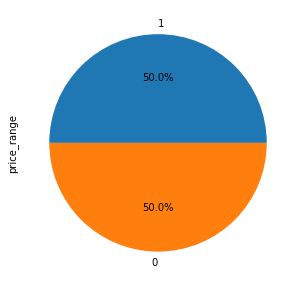

In [5]:
plt.figure(figsize=(5,5))
df['price_range'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.show()

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [8]:
def create_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

### Baseline Model

In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [10]:
log = LogisticRegression()
create_model(log)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       284
           1       0.90      0.89      0.90       316

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



LogisticRegression()

### SVM

#### Simple Linear SVM

<p>1. Hard margin</p>

In [11]:
from sklearn.svm import LinearSVC

In [12]:
svc1 = LinearSVC(random_state=1)
create_model(svc1)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       284
           1       0.93      0.84      0.88       316

    accuracy                           0.88       600
   macro avg       0.89      0.89      0.88       600
weighted avg       0.89      0.88      0.88       600



LinearSVC(random_state=1)

In [31]:
svc1.score(X_train,y_train)

0.8885714285714286

In [32]:
svc1.score(X_test,y_test)

0.8833333333333333

<p>2. Soft margin</p>

In [37]:
# soft margin range 0 - 1
svc2 = LinearSVC(random_state=1,C=0.9)
create_model(svc2)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       284
           1       0.93      0.84      0.88       316

    accuracy                           0.88       600
   macro avg       0.89      0.89      0.88       600
weighted avg       0.89      0.88      0.88       600



LinearSVC(C=0.9, random_state=1)

In [14]:
# After adding error there is no change there might be data non-linearly seperable
# hence we go head for other kernel functions

### SVM Kernel Functions

#### 1. Polynomial 

In [15]:
from sklearn.svm import SVC

In [16]:
poly_svc = SVC(random_state=1,kernel="poly",C=1.8)

In [17]:
create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       284
           1       0.98      0.99      0.98       316

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



SVC(C=1.8, kernel='poly', random_state=1)

#### 2. Radial Bais

In [18]:
radial_svc = SVC(random_state=1,kernel="rbf")

In [19]:
create_model(radial_svc)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       284
           1       0.99      0.97      0.98       316

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



SVC(random_state=1)

### Grid Search (Jose Portila - udemy)

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [25]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [26]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.514, total=   0.4s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.511, total=   0.4s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.511, total=   0.4s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.511, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.511, total=   0.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.514, total=   0.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.511, total=   0.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.511, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.511, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.514, total=   0.5s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.511, total=   0.6s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.511, total=   0.6s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.511, total=   0.6s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.511, total=   0.6s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.518, total=   0.5s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.514, total=   0.5s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ................. C=1000, gamma=0.001, score=0.511, total=   0.5s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.511, total=   0.7s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.750, total=   0.4s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.707, total=   0.3s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.732, total=   0.3s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.693, total=   0.3s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.707, total=   0.3s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   50.7s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [27]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [28]:
grid.best_estimator_

SVC(C=10, gamma=0.0001)

In [29]:
grid_prediction = grid.predict(X_test)

In [30]:
print(confusion_matrix(y_test,grid_prediction))
print(classification_report(y_test,grid_prediction))

[[282   2]
 [144 172]]
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       284
           1       0.99      0.54      0.70       316

    accuracy                           0.76       600
   macro avg       0.83      0.77      0.75       600
weighted avg       0.83      0.76      0.75       600

